# Fig3b 脊形图

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
# 读取CSV文件，使表头具有重复性质，去除“.{}”
def dataframe_allowing_duplicate_headers():
    # To Hold All The Possible Duplicate Tags ['.1', '.2', '.3', ...]
    dup_id_range = []

    # Load Your Excel File Using Pandas
    dataframe = pd.read_csv("../../data/LUNG_CellLine_ZScore_pivot_ridge.csv",index_col=0)

    # Generate And Store All The Possible Duplicate Tags ['.1', '.2', '.3', ...]
    for count in range(0, len(dataframe.columns)):
        dup_id_range.append( '.{}'.format(count) )

    # Search And Replace All Duplicate Headers To What It Was Set As Originally
    def rename(dataframe, character_number):
        duplicate_columns_chars = list(
            filter(lambda v: v[(len(v)-character_number):] in dup_id_range,
            dataframe.columns))

        for duplicate_column in duplicate_columns_chars:
            dataframe = dataframe.rename(
                columns={duplicate_column:duplicate_column[:-character_number]})
        return dataframe


    # Replace The Possible Duplicates Respectfully Based On Columns Count
    if len(dup_id_range) > 0:
        dataframe = rename(dataframe, 2)
        if len(dup_id_range) > 9:
            dataframe = rename(dataframe, 3)
            if len(dup_id_range) > 99:
                dataframe = rename(dataframe, 4)
                # If You Have More Than A Thousand Columns (lol)
                #if len(dup_id_range) > 999:
                #    dataframe = rename(dataframe, 5)

    return dataframe

In [3]:

# 将合并后的数据拼成一列，并生成一列对应的细胞系数据列
def concat_data(data):
    # 将所有列转换为一维数组，并生成列名数组
    col_names = data.columns
    merged_data = pd.concat([data[col] for col in col_names])

    # 生成用于标识每个值所属列的列名数组
    col_id = []
    for col in col_names:
        col_id += [col] * len(data)

    # 将列名和数据合并为一个数据框
    return pd.DataFrame({'CELL_LINE_NAME': col_id, 'IC_50': merged_data})

In [4]:

plot_data = dataframe_allowing_duplicate_headers()
# 首先同列合并相加
# cell_line_names = ['DU145','DUCAP','VCAP','LNCAP','PC3']
cols = plot_data.columns
plot_data = plot_data.groupby(cols,axis=1).mean()
df_filtered = concat_data(plot_data)
print(df_filtered.shape)

(720, 2)


C:\Users\query\AppData\Local\Temp\ipykernel_16268\423718406.py:5: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  plot_data = plot_data.groupby(cols,axis=1).mean()


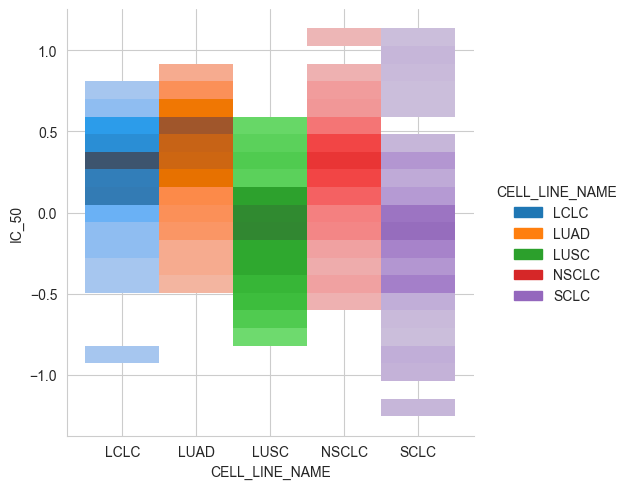

In [5]:
# 求每种细胞系IC50均值，看看这五种细胞系分布情况

sns.displot(data=df_filtered,x="CELL_LINE_NAME",y='IC_50',hue="CELL_LINE_NAME")

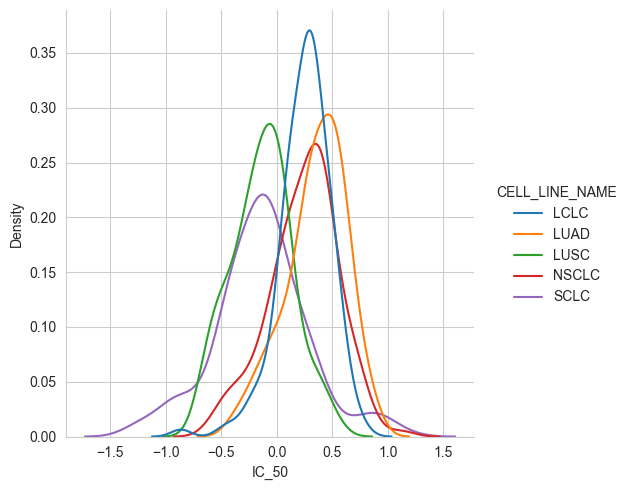

In [6]:
sns.displot(x="IC_50",data=df_filtered,kind="kde",hue="CELL_LINE_NAME")

<Axes: xlabel='CELL_LINE_NAME', ylabel='IC_50'>

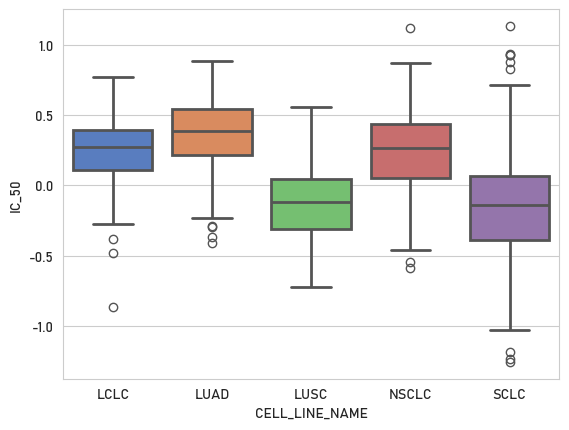

In [7]:
# palette = sns.color_palette("Set2", 12)
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 设置颜色方案
palette = sns.color_palette("muted", 5)
sns.boxplot(data=df_filtered,y="IC_50",x="CELL_LINE_NAME",hue="CELL_LINE_NAME",palette=palette, linewidth=2)

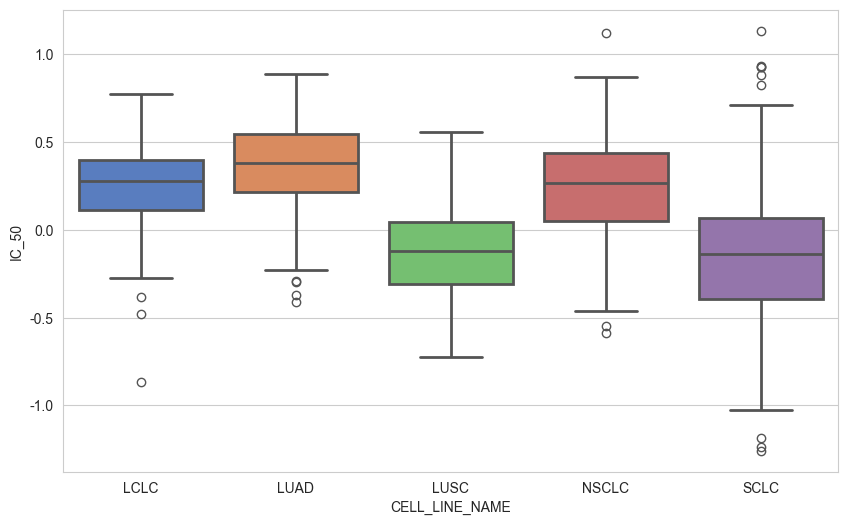

In [8]:
import matplotlib.pyplot as plt

# 创建一个新的图形和坐标轴
fig, ax = plt.subplots(figsize=(10, 6))


# 设置字体颜色和大小
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# 创建箱线图，并设置线的粗细
sns.boxplot(ax=ax, data=df_filtered, y="IC_50", x="CELL_LINE_NAME", hue="CELL_LINE_NAME", palette=palette, linewidth=2)

# 显示图形
plt.show()

In [9]:
avg = df_filtered.groupby('CELL_LINE_NAME').mean()
avg.sort_values(by='IC_50',inplace=True,ascending=False)
print(avg)

                   IC_50
CELL_LINE_NAME          
LUAD            0.354044
LCLC            0.251290
NSCLC           0.241363
LUSC           -0.135638
SCLC           -0.137761


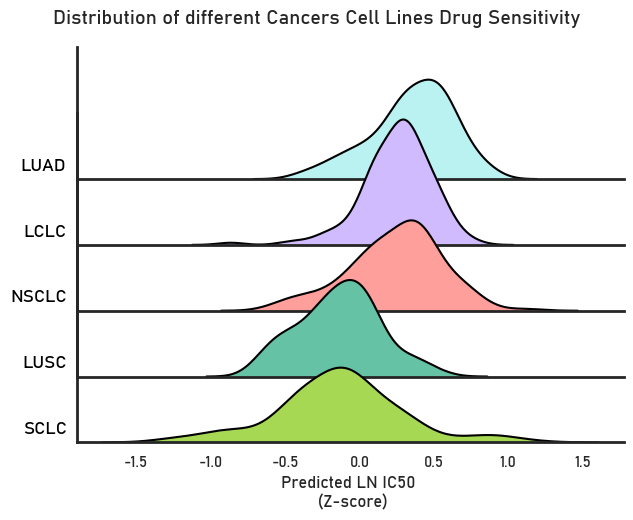

In [24]:
cell_line_names = ['LUAD','LCLC','NSCLC','LUSC','SCLC']

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0), 'axes.linewidth':2})
# 设置全局字体
plt.rcParams['font.sans-serif'] = ['Bahnschrift']
plt.rcParams['axes.unicode_minus'] = False
# 设置颜色方案
palette = {'LUAD':'#b9f2f0', 
           'LCLC':'#d0bbff', 
           'NSCLC':'#ff9f9b',
           'LUSC':'#66c2a5',
           'SCLC':'#a6d854'}
g = sns.FacetGrid(df_filtered, palette=palette, row="CELL_LINE_NAME",row_order=['LUAD','LCLC','NSCLC','LUSC','SCLC'], hue="CELL_LINE_NAME", aspect=6.5, height=1)
g.map_dataframe(sns.kdeplot, x="IC_50", fill=True, alpha=1)
g.map_dataframe(sns.kdeplot, x="IC_50", color='black')
def label(x, color, label):
        ax = plt.gca()
        # 坐标（x,y）
        ax.text(-0.02, .1, label, color='black', fontsize=13,
            ha="right", va="center", transform=ax.transAxes)
g.map(label, "CELL_LINE_NAME")
g.fig.subplots_adjust(hspace=-.5)
g.set_titles("")
g.set(yticks=[], xlabel="Predicted LN IC50 \n (Z-score)",ylabel = None)
g.despine(left=True)
# g.set_ylabels(label='PCa Cell Lines', clear_inner=False)
sns.despine()
plt.suptitle('Distribution of different Cancers Cell Lines Drug Sensitivity', y=1)
# plt.tight_layout()
plt.savefig('ridge_plot.png',dpi = 300)
plt.show()

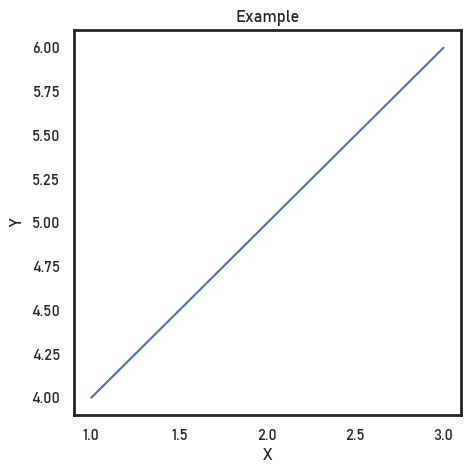

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5)) # 创建一个 5*5 的画布
plt.plot([1, 2, 3], [4, 5, 6]) # 绘制一条线
ax = plt.gca() # 获取当前坐标轴对象
ax.set_title("Example") # 设置标题
ax.set_xlabel("X") # 设置 X 轴标签
ax.set_ylabel("Y") # 设置 Y 轴标签
plt.show() # 显示图形

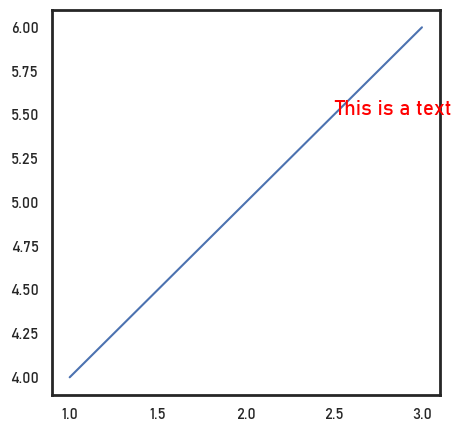

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5)) # 创建一个 5*5 的画布
plt.plot([1, 2, 3], [4, 5, 6]) # 绘制一条线
ax = plt.gca() # 获取当前坐标轴对象
ax.text(2.5, 5.5, "This is a text", fontsize=15, color="red") # 在 (2.5, 5.5) 的位置添加红色的文本
plt.show() # 显示图形

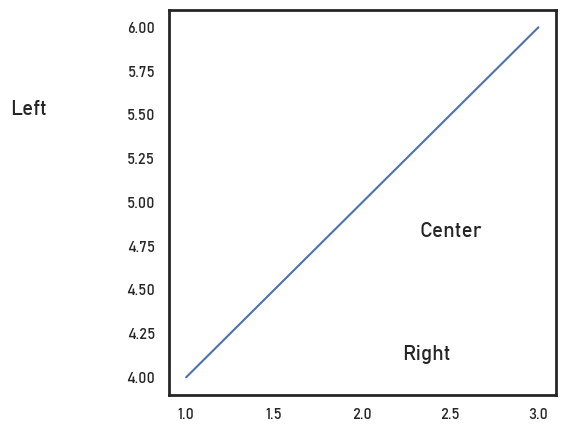

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5, 5)) # 创建一个 5*5 的画布
plt.plot([1, 2, 3], [4, 5, 6]) # 绘制一条线
ax = plt.gca() # 获取当前坐标轴对象
ax.text(0, 5.5, "Left", horizontalalignment="left", fontsize=15) # 在 (2.5, 5.5) 的位置添加左对齐的文本
ax.text(2.5, 4.8, "Center", horizontalalignment="center", fontsize=15) # 在 (2.5, 4.8) 的位置添加居中对齐的文本
ax.text(2.5, 4.1, "Right", horizontalalignment="right", fontsize=15) # 在 (2.5, 4.1) 的位置添加右对齐的文本
plt.show() # 显示图形